In [12]:
import os
import zipfile
import tensorflow as tf

### Data Preprocessing

In [13]:
# Training data location
local_zip = './data/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/horse-or-human')

# Validation data location
local_zip = './data/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/validation-horse-or-human')
zip_ref.close()

In [14]:
# Train horse data directory
train_horse_dir = os.path.join('./data/horse-or-human/horses')

# Train human data directory
train_human_dir = os.path.join('./data/horse-or-human/humans')

# Validation horse data directory
validation_horse_dir = os.path.join('./data/validation-horse-or-human/horses')

# Validation human data directory
validation_human_dir = os.path.join('./data/validation-horse-or-human/humans')

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Rescales images
validation_datagen = ImageDataGenerator(rescale=1/255)

In [20]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    # This is the source directory for training images
    './data/horse-or-human/',
    # All images will be resized to 150x150
    target_size=(300, 300),
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    # This is the source directory for training images
    './data/validation-horse-or-human/',
    # All images will be resized to 150x150
    target_size=(300, 300),
    batch_size=32,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Model Definition

In [24]:
# Defines the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 
                           (3,3), 
                           activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 
                           (3,3), 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, 
                          activation='relu'),
    tf.keras.layers.Dense(1, 
                          activation='sigmoid')
])

### Model Fitting

In [25]:
# Compiles the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [26]:
# Fits the model
history = model.fit(
    train_generator,
    steps_per_epoch=8,  
    epochs=10,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 1.0000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff2b27e80e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and at

### Model Evaluation

In [27]:
import matplotlib.pyplot as plt

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

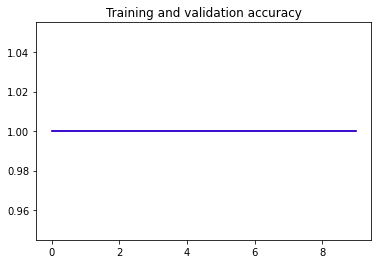

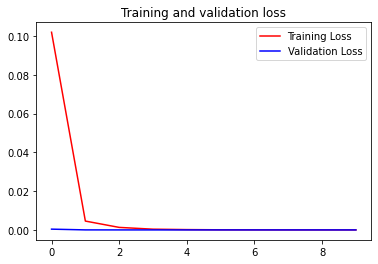

In [29]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()